#House Price Prediction EDA (CA-01)

Import the necessary libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
df=pd.read_csv('https://raw.githubusercontent.com/ArinB/MSBA-CA-Data/main/CA01/house-price-train.csv')

## Part 1: Data Understanding


In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

The data has 1460 observations and 81 columns which we should reduce to be able to better understand the data.


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:

df.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [7]:
missingpct=(df.isnull().sum()/len(df))*100
missingpct[missingpct>50].sort_values(ascending=False)

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027


We have five features with more than 50% missing values and these include pool quality, Miscellaneous features, Masonry veneer type, fence quality, and the type of alley access to the properties. These features are worth exploring more to see if we will need to drop them.

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The target variable we are looking at in this model is Sale Price which represents the sale price of each house in the dataset. We are aiming to understand the factos that have an impact on Sale Price.

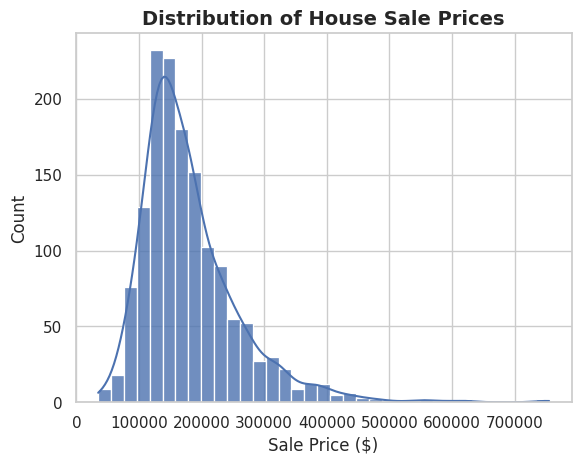

In [9]:
sns.histplot(
    df["SalePrice"],
    bins=35,          # slightly fewer bins
    kde=True,
    color="#4C72B0",
    alpha=0.8,
    edgecolor="white"
)
plt.title("Distribution of House Sale Prices", fontsize=14, weight="bold")
plt.xlabel("Sale Price ($)", fontsize=12)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

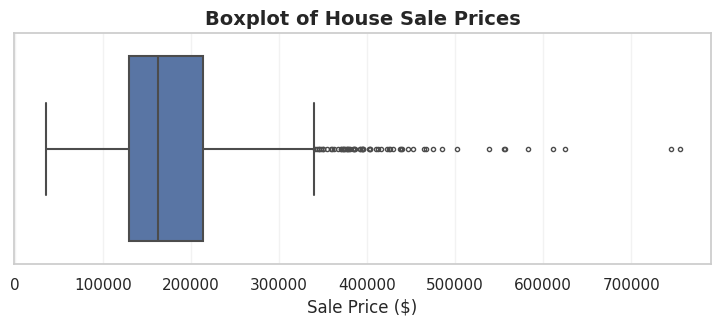

In [10]:
plt.figure(figsize=(9, 3))

sns.boxplot(
    x=df["SalePrice"],
    fliersize=3,
    linewidth=1.5
)

plt.title("Boxplot of House Sale Prices", fontsize=14, weight="bold")
plt.xlabel("Sale Price ($)", fontsize=12)

plt.ticklabel_format(style="plain", axis="x")
plt.grid(axis="x", alpha=0.25)

plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

We can see that the distribution of house sale prices is right skewed with the majority of homes selling in the lower price ranges. Through the box plot we can see that there are a number of extreme outliers that might be disproportionaley affecting the model predictions. We can already note the potential need for addressing the outliers to get a model that better fits the context of homes we're most focused on.


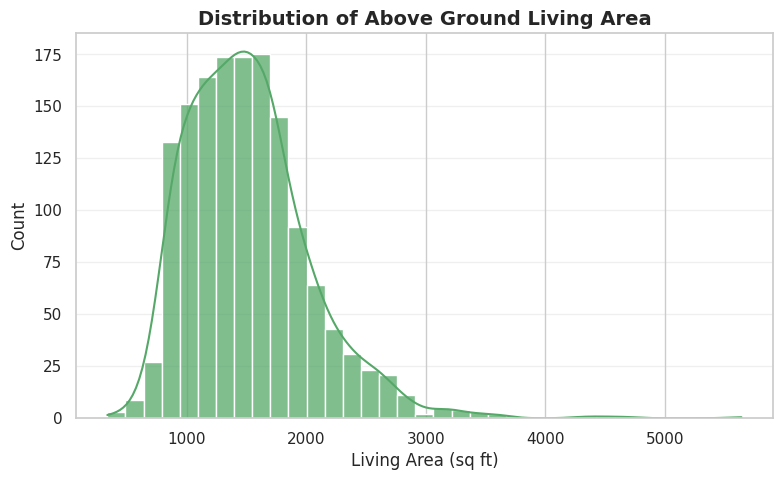

In [11]:
plt.figure(figsize=(9,5))

sns.histplot(
    df["GrLivArea"],
    bins=35,
    kde=True,
    color="#55A868",
    alpha=0.75,
    edgecolor="white"
)

plt.title("Distribution of Above Ground Living Area", fontsize=14, weight="bold")
plt.xlabel("Living Area (sq ft)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.ticklabel_format(style="plain", axis="x")
plt.grid(axis="y", alpha=0.3)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

In [12]:
print(df['GrLivArea'].describe())

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


The distribution of above ground living area is right skewed highlighting that most homes in the dataset are concentrated between 1,000 and 2,000 square feet. There are some noticeable outlier properties with much larger living areas.These outliers may be disproportionately influencing the relationship of living area on sale price in the predictive model. The long right tail highlights the max living area home in the dataset which is around 5,642 square feet while the average is significantly lower at 1,515 square feet.

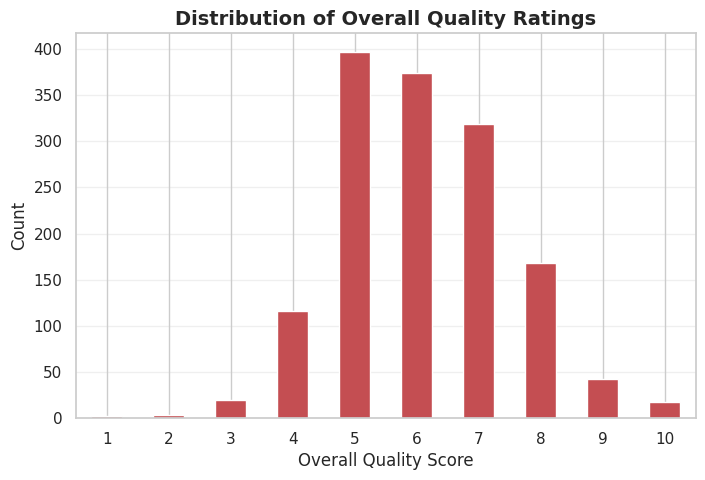

In [13]:
plt.figure(figsize=(8,5))

df["OverallQual"].value_counts().sort_index().plot(
    kind="bar",
    color="#C44E52",
    edgecolor="white"
)

plt.title("Distribution of Overall Quality Ratings", fontsize=14, weight="bold")
plt.xlabel("Overall Quality Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

The distribution of Overall Quality Scores shows a concentration of scores between 5 and 7. Most homes in the dataset are at least either average or above average quality. The homes with very low ratings or very high quality ratings are more uncommon but the feature will likely be a predictor in our Sale Price prediction model.

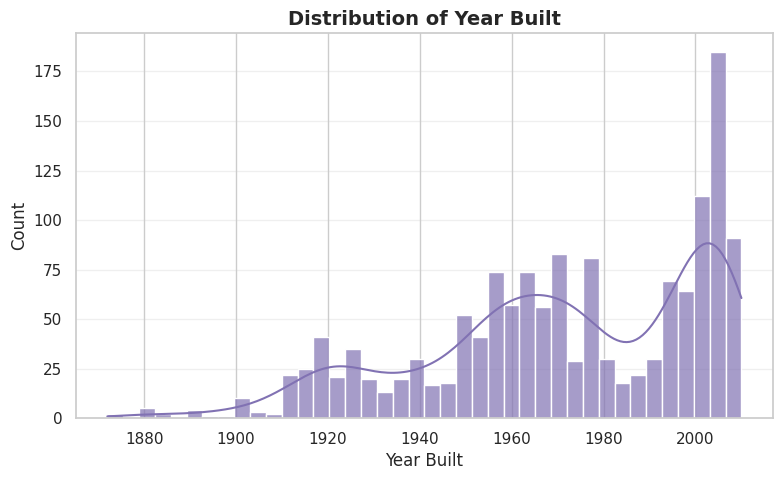

In [14]:
plt.figure(figsize=(9,5))

sns.histplot(
    df["YearBuilt"],
    bins=40,
    kde=True,
    color="#8172B3",
    alpha=0.7
)

plt.title("Distribution of Year Built", fontsize=14, weight="bold")
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis="y", alpha=0.3)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

The distribution of year built tells us that very few homes were built before 1900 and since then there have been three peaks in homes built. These peaks occured in the early 1900s, the mid 20th century and the early 2000's. The rate of construction has increased heavily since 1900.

In [15]:
categorical_fts = df.select_dtypes(include="object").columns
categorical_fts


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Given the categorical features available, we examined their respective distributions in the dataset.

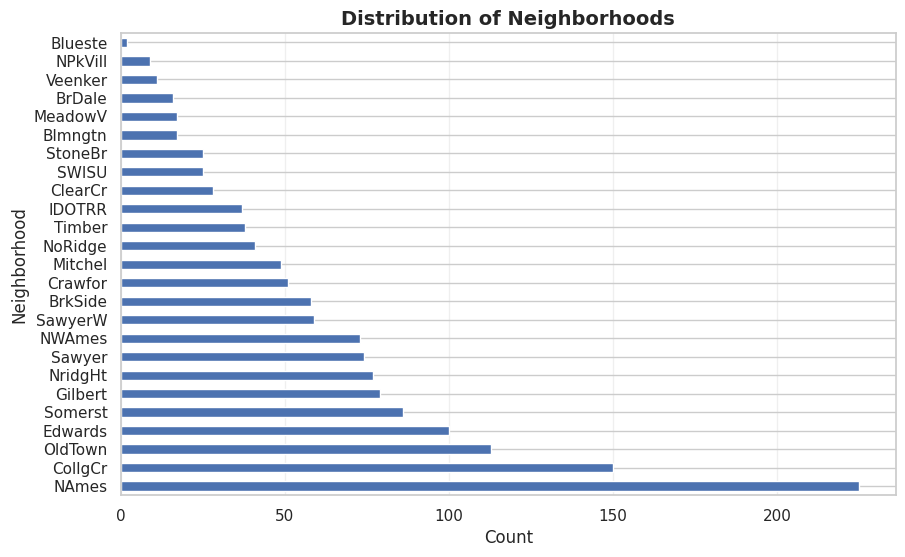

In [16]:
df["Neighborhood"].value_counts().plot(kind="barh", figsize=(10,6))
plt.title("Distribution of Neighborhoods", fontsize=14, weight="bold")
plt.xlabel("Count")
plt.ylabel("Neighborhood")
plt.grid(axis="x", alpha=0.3)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

The distribution of neighborhoods in the dataset is imbalanced with a small number of neighborhoods accounting for a large portion of all the homes in the dataset.

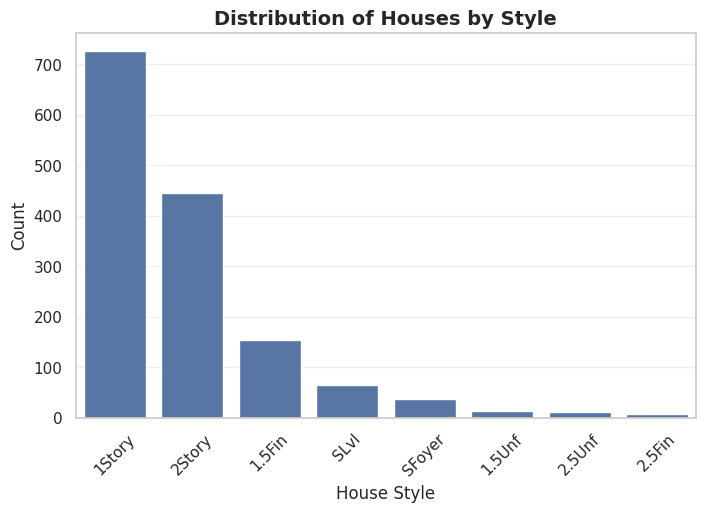

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(
    x="HouseStyle",
    data=df,
    order=df["HouseStyle"].value_counts().index
)

plt.title("Distribution of Houses by Style", fontsize=14, weight="bold")
plt.xlabel("House Style")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

The distribution of house styles also shows an imbalanced dataset with one and two story homes accounting for the majority of the properties in the dataset.

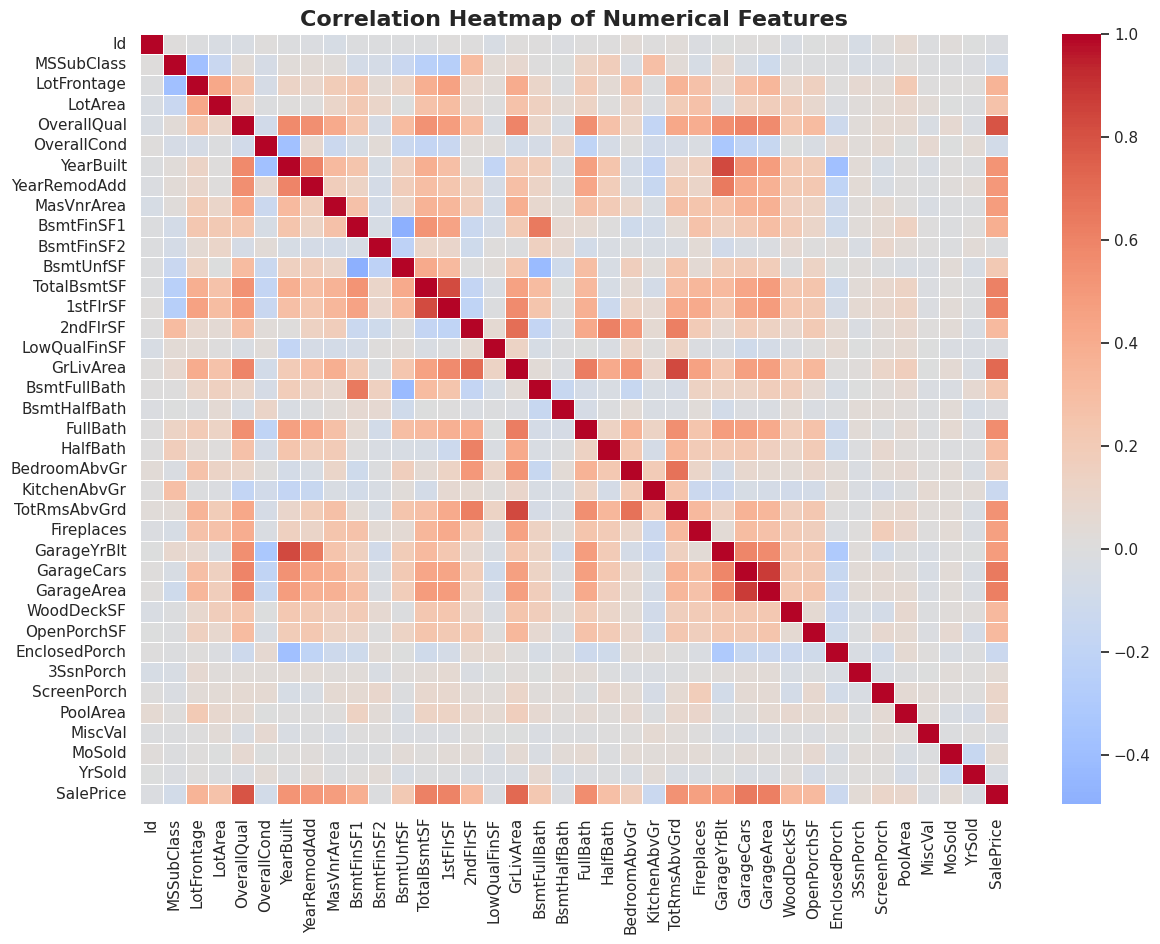

In [18]:
plt.figure(figsize=(14,10))

sns.heatmap(
    df.select_dtypes(include=["int64", "float64"]).corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16, weight="bold")
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

From the heatmap showing the numerical features, we can see that the variables with the highest impact on Sale Price include the Overall Quality score, the amount of above ground square feet, the square feet of the basement, the size of the garage in square feet as well as the amount of cars that fit in the garage. These features will likely be useful for our model predictions.

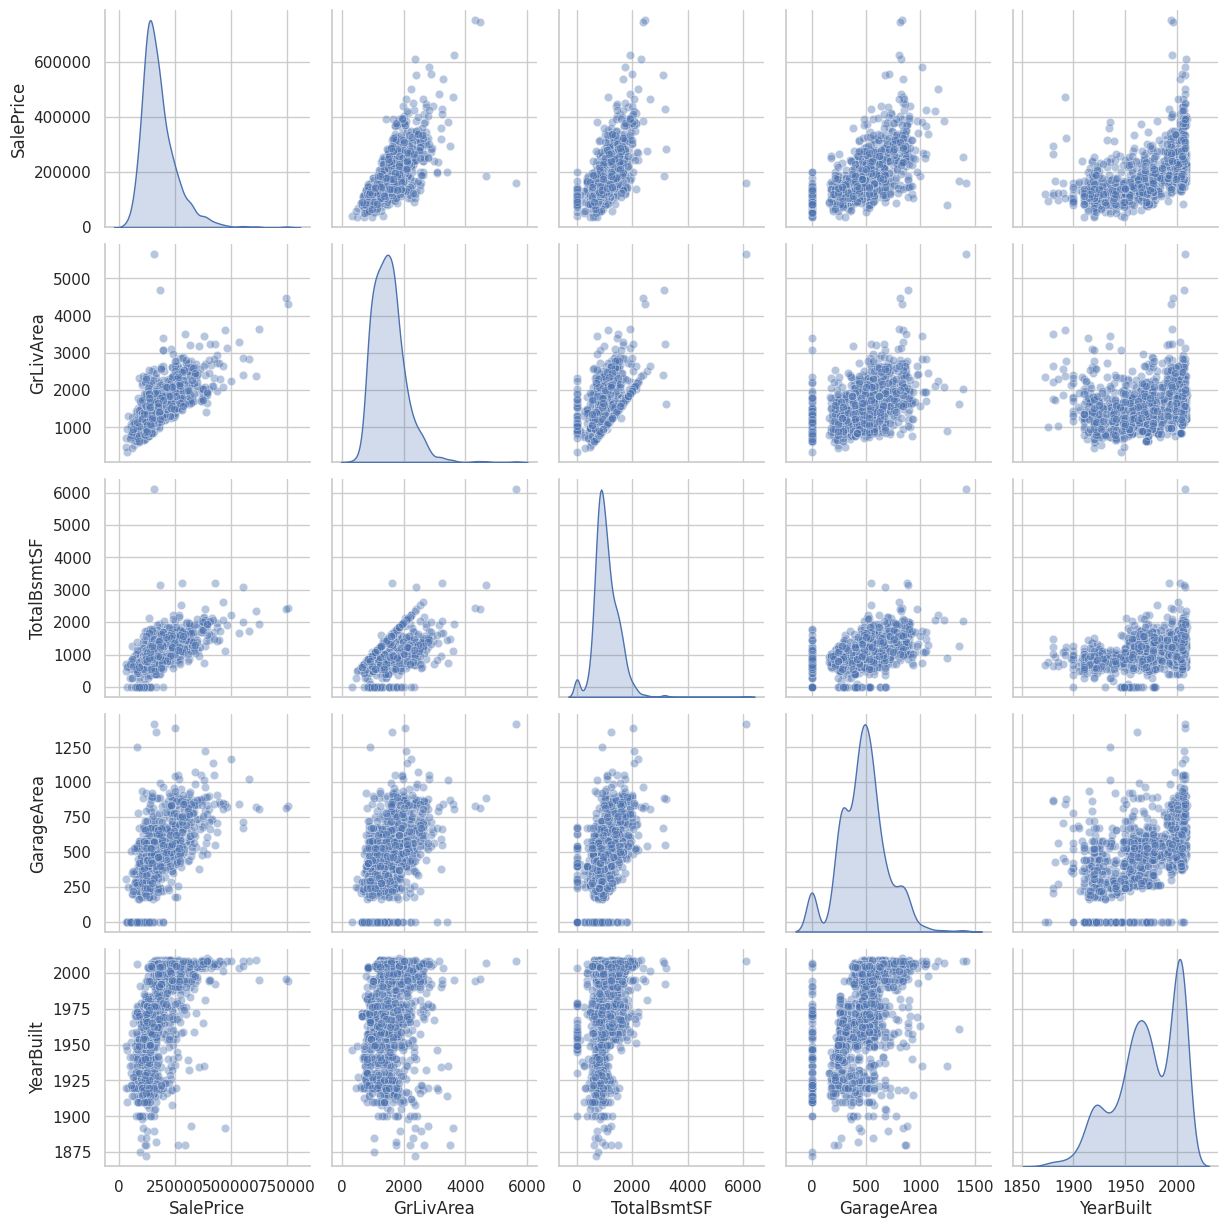

In [19]:
scatter_matrix_cols = [
    "SalePrice",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageArea",
    "YearBuilt"
]

sns.pairplot(
    df[scatter_matrix_cols],
    diag_kind="kde",
    plot_kws={"alpha": 0.4}
)

plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

After determining the most important numerical variables from the heatmap, I used a scatter plot matrix to have a more focused view of the relationship of different features with Sale Price. We can see strong positive relationships between Sale Price and size related features which reinforces our earlier findings. We can also see more scattered dispersions at the higher values. The relationship between Sale Price and year built is important to note as year built alone doesn't seem to fully explain price variation. We should focus on property size related features as the key driver of housing prices.

In [20]:
#Check the correlation between Sale Price and the Overall Quality score
print(df['SalePrice'].corr(df['OverallQual']))

0.7909816005838044


In [21]:
#Check the correlation between Sale Price and the Above Ground Square Feet
print(df['SalePrice'].corr(df['GrLivArea']))

0.7086244776126523


In [22]:
##group data by a categorical column

df.groupby("Neighborhood")["SalePrice"].median().sort_values(ascending=False)


,SalePrice
Neighborhood,
NridgHt,315000.0
NoRidge,301500.0
StoneBr,278000.0
Timber,228475.0
Somerst,225500.0
Veenker,218000.0
Crawfor,200624.0
ClearCr,200250.0
CollgCr,197200.0


Given the neighborhood data was right skewed, I compared sale price within the neighborhoods. I found the median to make a more robust measure of central tendency given the neighborhood histogram showed extreme outlier values and the mean could skew the impact of the feature. The neighborhood feature does appear to be important for our analysis given the price variance across neighborhoods.

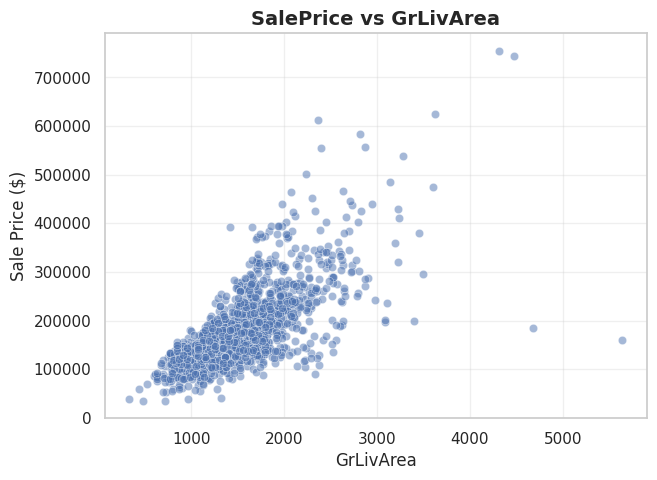

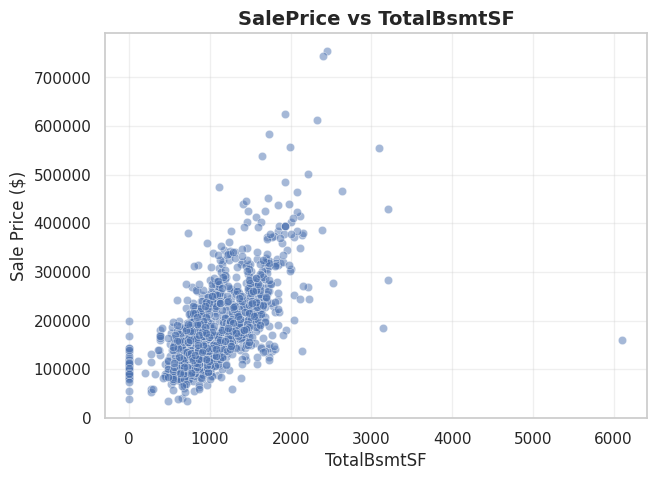

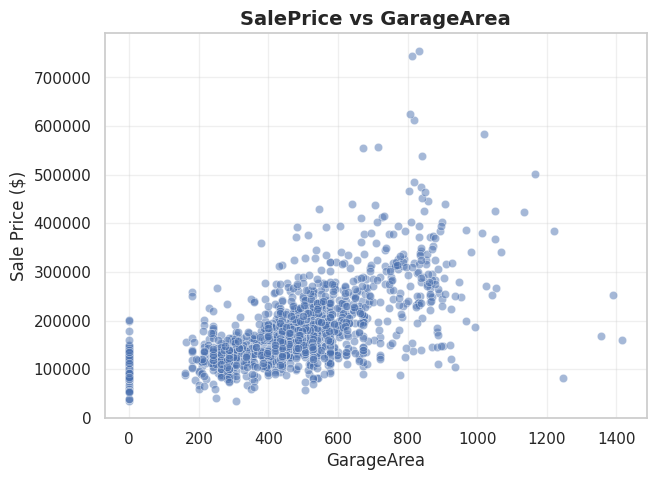

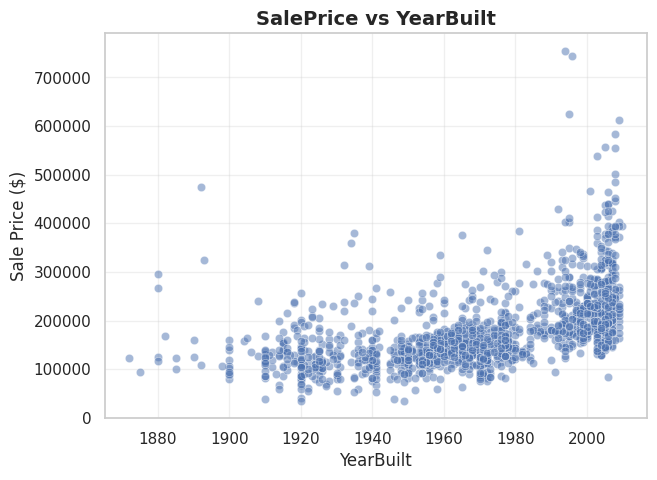

In [23]:
num_scatter_features = [
    "GrLivArea",
    "TotalBsmtSF",
    "GarageArea",
    "YearBuilt"
]
for col in num_scatter_features:
    plt.figure(figsize=(7,5))

    sns.scatterplot(
        x=col,
        y="SalePrice",
        data=df,
        alpha=0.5
    )

    plt.title(f"SalePrice vs {col}", fontsize=14, weight="bold")
    plt.xlabel(col)
    plt.ylabel("Sale Price ($)")

    plt.ticklabel_format(style="plain", axis="y")
    plt.grid(alpha=0.3)
    plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

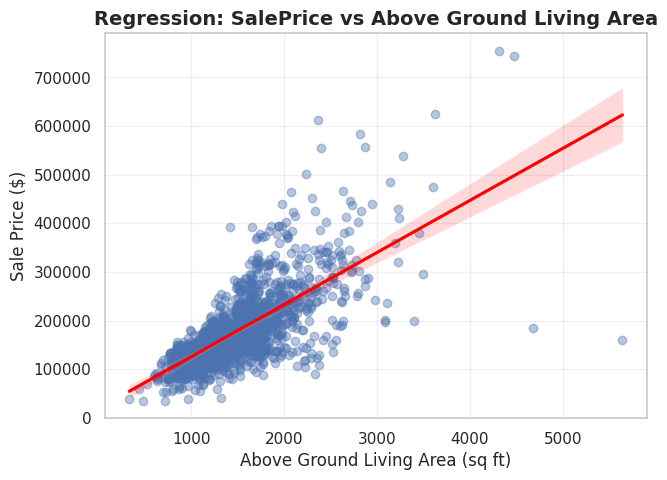

In [24]:
plt.figure(figsize=(7,5))

sns.regplot(
    x="GrLivArea",
    y="SalePrice",
    data=df,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)

plt.title("Regression: SalePrice vs Above Ground Living Area", fontsize=14, weight="bold")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(alpha=0.3)
plt.show()
#ChatGPT was used iteratively to generate and refine visualizations by specifying variables and graph types across multiple prompt iterations.

After reviewing the relationships of the numerical features in the heatmap, I used scatterplots to visualize the clear relationsips between features and Sale Price. The first scatterplot shows a high positive correlation between sale price and above ground living area. The larger homes sell for more though there are some outliers in the dataset. The basement area and garage area features also show positive relationships with Sale Price but these are more dispersed, likely due to a smaller effect on sale price. The year built scatter plot shows an upward trend in sale price for homes that were more recently built but there is significant variation in the data. The size related features have the highest and most consistent explanatory power for sale price.

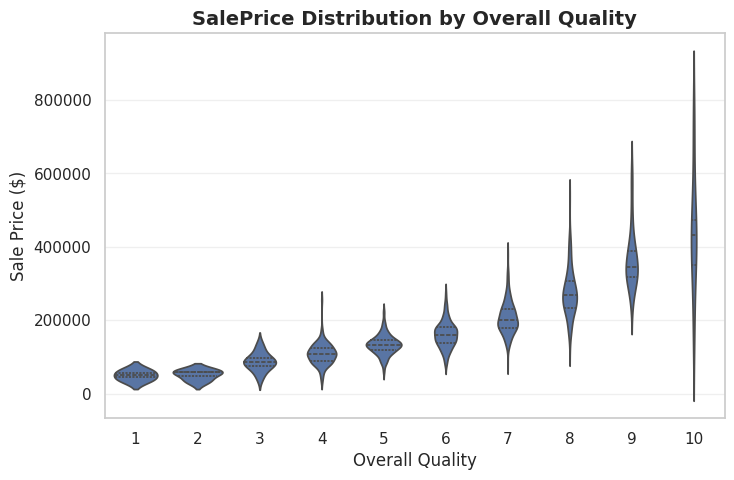

In [25]:
plt.figure(figsize=(8,5))
sns.violinplot(
    x="OverallQual",
    y="SalePrice",
    data=df,
    inner="quartile"
)

plt.title("SalePrice Distribution by Overall Quality", fontsize=14, weight="bold")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price ($)")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis="y", alpha=0.3)
plt.show()


The violin plot confirms a strong relationship between the overall quality rating and sale price. The higher quality homes are consistent with higher prices and we can see that the quality score is an influential categorical predictor of house prices. The homes with the highest quality scores have higher price variability and contain extreme outliers. This will be an important feature to use in our prediction model.

### Based on the exploratory data analysis done above, the following section provides the overall quality of the datasets and provides key features to consider relevant for the predictive modeling.

# Data Quality Report

### Dataset Overview
The dataset we are looking at contains 1,460 observations and 81 features describing residential properties with a focus on Sale Price as the target variable. The features included have a combination of numercial and categorical variables related to the property size, the location, the quality score, and various construction characteristics.

### Missing Data
We conducted an assessment of missing values and filtered that further to only the variables that have more than 50% missing data. The features with more than 50% missing values are Pool quality, Miscellaneous features, Alley entrance, fence, and fireplace quality. These missing values are likely not data collection errors but rather simply indicate that certain properties don't have those features. There are other features with smaller amounts of missing data and we can potentially use imputation for them during preprocessing.

### Data Types and Consistency
The dataset has both numerical and categorical features stored in the appropriate data types. The numerical variables include living area, basement size, garage area, and year built. The categorical variable we have are descriptive features that include quality ratings, house style, and neighborhood.
There were no observed inconsistences in data types that I observed.

###Outliers and Distribution Characteristics
Several numerical values like Sale Price, Above Ground living area, total basement square feet and garage area all exhibit right skewed distributions with extreme outliers. The outliers in the data appear to refer to valid properties but it also may cause a disprorportionate influence on model performance if it is not addressed.

###Categorical Feature Distribution
The categorical features we looked at like Neighborhood and House style display a very significant class imbalance with a small number of categories accounting for a majority proportion of observations. There are also some categories that appear less frequently which may limit their utility in the predictive model.

### Target Variable Quality
Sale Price has no missing values but is skewed right and contains several extreme outliers. It might be useful to use logarithmic scaling or other transformations to improve the model stability and predictive performance.

###Summary and Implications for Modeling
To conclude the DQR, the dataset is of good quality with consistent features. The key data quality considerations to address include: handling the missing values in features with high missing rates,addressing skewness and extreme outliers in numerical features, and addressing class imabalances in categorical features.

## Part 2: Data Preprocessing and Feature Preparation
###Handling Missing Values
###Outlier Treatment
###Categorical Encoding

---



The goal of preprocessing is to prepare the dataset for modeling. In this portion we will use the findings from part 1 to address missing values, manage the categorical features, and handle the skewdness of certain features.

In [26]:
## I am first creating a copy of the original dataframe
df_clean=df.copy()

In [27]:
drop_cols = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu"
]


In [28]:
df_clean = df_clean.drop(columns=drop_cols)
df_clean.shape

(1460, 76)

###Feature Removal Based on the Missingness of the data
I removed the five features with more than 50% missing values that we observed in part 1. All five of the features represent property characteristics viewed as optional in homes but are absent for most homes. This removal simplifies the features without potentially creating information loss.

In [29]:
missing_after_drop = (df_clean.isnull().sum() / len(df_clean)) * 100
missing_after_drop.sort_values(ascending=False).head(10)


,0
MasVnrType,59.726027
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageCond,5.547945
GarageQual,5.547945
GarageFinish,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740
BsmtCond,2.534247


After dropping the features with the most missing values, we are still left with others to address.
Masonry Veneer type is not a feature in most homes and that contributes to its missingness. We will be dropping that column since it is just adding noise.

For the rest of the features, given the missingness is lower, it is likely a result of unknown or not recorded values. For these I will use imputation to retain the features in the model.

In [30]:
df_clean = df_clean.drop(columns=['MasVnrType'])

In [31]:
##Lot frontage has close to 18% missingness and we will be filling the missing values with the median in the data to prevent sensitivity to outliers
df_clean["LotFrontage"] = df_clean["LotFrontage"].fillna(
    df_clean["LotFrontage"].median()
)


In [32]:
#For the featues related to garages I used chatGPT to help create a loop that goest through all garage related features and fills in missing values with "None" to identify those homes with no garage
garage_cols = [
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond"
]

for col in garage_cols:
    df_clean[col] = df_clean[col].fillna("None")

df_clean["GarageYrBlt"] = df_clean["GarageYrBlt"].fillna(0)
#I also filled garage year built with 0 if the other garage related variables all have missing values


In [33]:
#For the featues related to basements, I used chatGPT to help create a loop that goes through all basement related features and fills in missing values with "None" to identify those homes with no basemenet
bsmt_cols = [
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtQual",
    "BsmtFinType2"
]

for col in bsmt_cols:
    df_clean[col] = df_clean[col].fillna("None")


In [34]:
(df_clean.isnull().sum() / len(df_clean) * 100).sort_values(ascending=False).head(10)


,0
MasVnrArea,0.547945
Electrical,0.068493
Id,0.000000
LotFrontage,0.000000
LotArea,0.000000
Street,0.000000
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000
MSSubClass,0.000000


In [35]:
## For Masonry veneer area I am imputing the couple of missing values with zero as it indicates an absence of a masonry veneer as opposed to it simply being unknown
df_clean['MasVnrArea']=df_clean['MasVnrArea'].fillna(0)

In [36]:
##The electrical feature contained a very small number of missing values so I used the mode to impute using the most frequent electrical category
df_clean["Electrical"] = df_clean["Electrical"].fillna(
    df_clean["Electrical"].mode()[0]
)


In [37]:
print((df_clean.isnull().sum() / len(df_clean) * 100).sort_values(ascending=False).head(10))
print(df_clean.shape)

Id             0.0
MSSubClass     0.0
MSZoning       0.0
LotFrontage    0.0
LotArea        0.0
Street         0.0
LotShape       0.0
LandContour    0.0
Utilities      0.0
LotConfig      0.0
dtype: float64
(1460, 75)


In this step we worked on feature removal and imputation and left the dataset with no missing values. As for the missing values we did not want to drop, we used informed strategies for imputation relevant to each respective feature.

###Various Data Statistics - Outliers


In [38]:
num_cols = [
    "SalePrice",
    "GrLivArea",
    "TotalBsmtSF",
    "GarageArea",
    "LotArea"
]
outlier_summary = {}

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    outlier_summary[col] = outlier_count

outlier_summary


{'SalePrice': np.int64(61),
 'GrLivArea': np.int64(31),
 'TotalBsmtSF': np.int64(61),
 'GarageArea': np.int64(21),
 'LotArea': np.int64(69)}

In [39]:
#The outliers were identified with the IQR method to strategically address different features. The outliers I focused on addressing are those present in the Above Ground Living area features

df_clean = df_clean[
    ~((df_clean["GrLivArea"] > 4000) & (df_clean["SalePrice"] < 300000))
]



In [40]:
##For the Basement sqare feet and garage area we set an upper cap to only include those values below the 99th percentile
upper_cap = df_clean["TotalBsmtSF"].quantile(0.99)
upper_cap = df_clean["GarageArea"].quantile(0.99)
df_clean["GarageArea"] = df_clean["GarageArea"].clip(upper=upper_cap)
df_clean["TotalBsmtSF"] = df_clean["TotalBsmtSF"].clip(upper=upper_cap)



In [41]:
outlier_summary_after = {}

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_summary_after[col] = (
        (df_clean[col] < lower) | (df_clean[col] > upper)
    ).sum()

outlier_summary_after


{'SalePrice': np.int64(61),
 'GrLivArea': np.int64(29),
 'TotalBsmtSF': np.int64(72),
 'GarageArea': np.int64(20),
 'LotArea': np.int64(66)}

In [42]:
##Several categorical features are ordinal so I used ordinal encoding
ordinal_cols = [
    "ExterQual", "ExterCond",
    "BsmtQual", "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "GarageQual", "GarageCond"
]
qual_map = {
    "None": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}
for col in ordinal_cols:
    df_clean[col] = df_clean[col].map(qual_map)
#For the categorical encoding I used chatGPT to help create a loop that goest through all ordinal variables and assigns them a label

Ordinal categorical features were encoded using a consistent numerical scale to be able to determine their inherent ranking and maintains the order information for modeling.

In [43]:
nominal_cols = [
    "Neighborhood",
    "HouseStyle",
    "BldgType",
    "RoofStyle",
    "Exterior1st",
    "Exterior2nd"
]
df_clean = pd.get_dummies(
    df_clean,
    columns=nominal_cols,
    drop_first=True
)
#I used chat to learn about pd.get_dummies

The nominal categorical variables without ordering were transformed with one hot encoding.To avoid multicollinearity issues the first value in each category was dropped.

In [44]:
numeric_df = df_clean.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_df.corr()


saleprice_corr = (
    corr_matrix["SalePrice"]
    .sort_values(ascending=False)
)

saleprice_corr.head(15)


,SalePrice
SalePrice,1.000000
OverallQual,0.795774
GrLivArea,0.734968
ExterQual,0.686756
KitchenQual,0.662236
GarageCars,0.641047
GarageArea,0.633276
1stFlrSF,0.631530
BsmtQual,0.586674
FullBath,0.562165


## Part 3: Post Processing
###Using a correlation matrix with the numeric variables against sale price to determine feature selection

The features that have the highest correlation with Sale Price include the Overall Quality rating, the above ground living area, the total square feet of the basement, size and capacity of garages,first floor square feet, and year built.

All of these features focus on size, quality, and the recency of the property being built.

In [45]:
#For simplicity in the model and to prevent multicollinearity I am going to take care of the redundant features

df_clean=df_clean.drop(columns=[
    "GarageCars",
    "TotRmsAbvGrd",
    "1stFlrSF",
    "YearRemodAdd"
])

Since we have Garage Cars and Garage Area, we dropped Garage Cars. We also dropped total rooms above ground since we already have above ground living area. We also removed the year remodeled feature and first floor square feet since we have total basement square feet and year built.

Our feature selection was guided by a visualization and correlation analysis with the Sale Price feature. We removed the redundant variables that measure similar characteristics to reduce multicollinearity in the model.

In [46]:

corr_matrix = numeric_df.corr()


corr_matrix = corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

corr_matrix.round(3)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.011,-0.020,-0.038,-0.030,0.013,-0.013,-0.023,-0.054,0.003,...,-0.030,-0.002,0.003,-0.047,0.001,0.048,-0.006,0.024,0.000,-0.022
MSSubClass,0.011,1.000,-0.374,-0.142,0.033,-0.059,0.028,0.041,0.023,0.016,...,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.020,-0.374,1.000,0.274,0.219,-0.051,0.110,0.076,0.151,0.147,...,0.070,0.105,0.014,0.066,0.042,0.100,0.001,0.024,0.007,0.353
LotArea,-0.038,-0.142,0.274,1.000,0.091,-0.003,0.007,0.008,0.084,0.040,...,0.169,0.062,-0.017,0.021,0.045,0.036,0.039,0.006,-0.014,0.268
OverallQual,-0.030,0.033,0.219,0.091,1.000,-0.090,0.571,0.550,0.399,0.723,...,0.237,0.297,-0.113,0.031,0.066,0.045,-0.031,0.073,-0.027,0.796
OverallCond,0.013,-0.059,-0.051,-0.003,-0.090,1.000,-0.376,0.075,-0.124,-0.138,...,-0.003,-0.030,0.070,0.025,0.055,0.002,0.069,-0.004,0.044,-0.078
YearBuilt,-0.013,0.028,0.110,0.007,0.571,-0.376,1.000,0.592,0.309,0.597,...,0.224,0.184,-0.387,0.032,-0.050,-0.005,-0.034,0.013,-0.013,0.524
YearRemodAdd,-0.023,0.041,0.076,0.008,0.550,0.075,0.592,1.000,0.173,0.587,...,0.205,0.223,-0.194,0.046,-0.038,-0.003,-0.010,0.022,0.036,0.508
MasVnrArea,-0.054,0.023,0.151,0.084,0.399,-0.124,0.309,0.173,1.000,0.336,...,0.157,0.102,-0.109,0.020,0.064,-0.020,-0.029,-0.005,-0.007,0.478
ExterQual,0.003,0.016,0.147,0.040,0.723,-0.138,0.597,0.587,0.336,1.000,...,0.206,0.280,-0.149,0.038,0.014,0.013,-0.039,0.044,-0.006,0.687


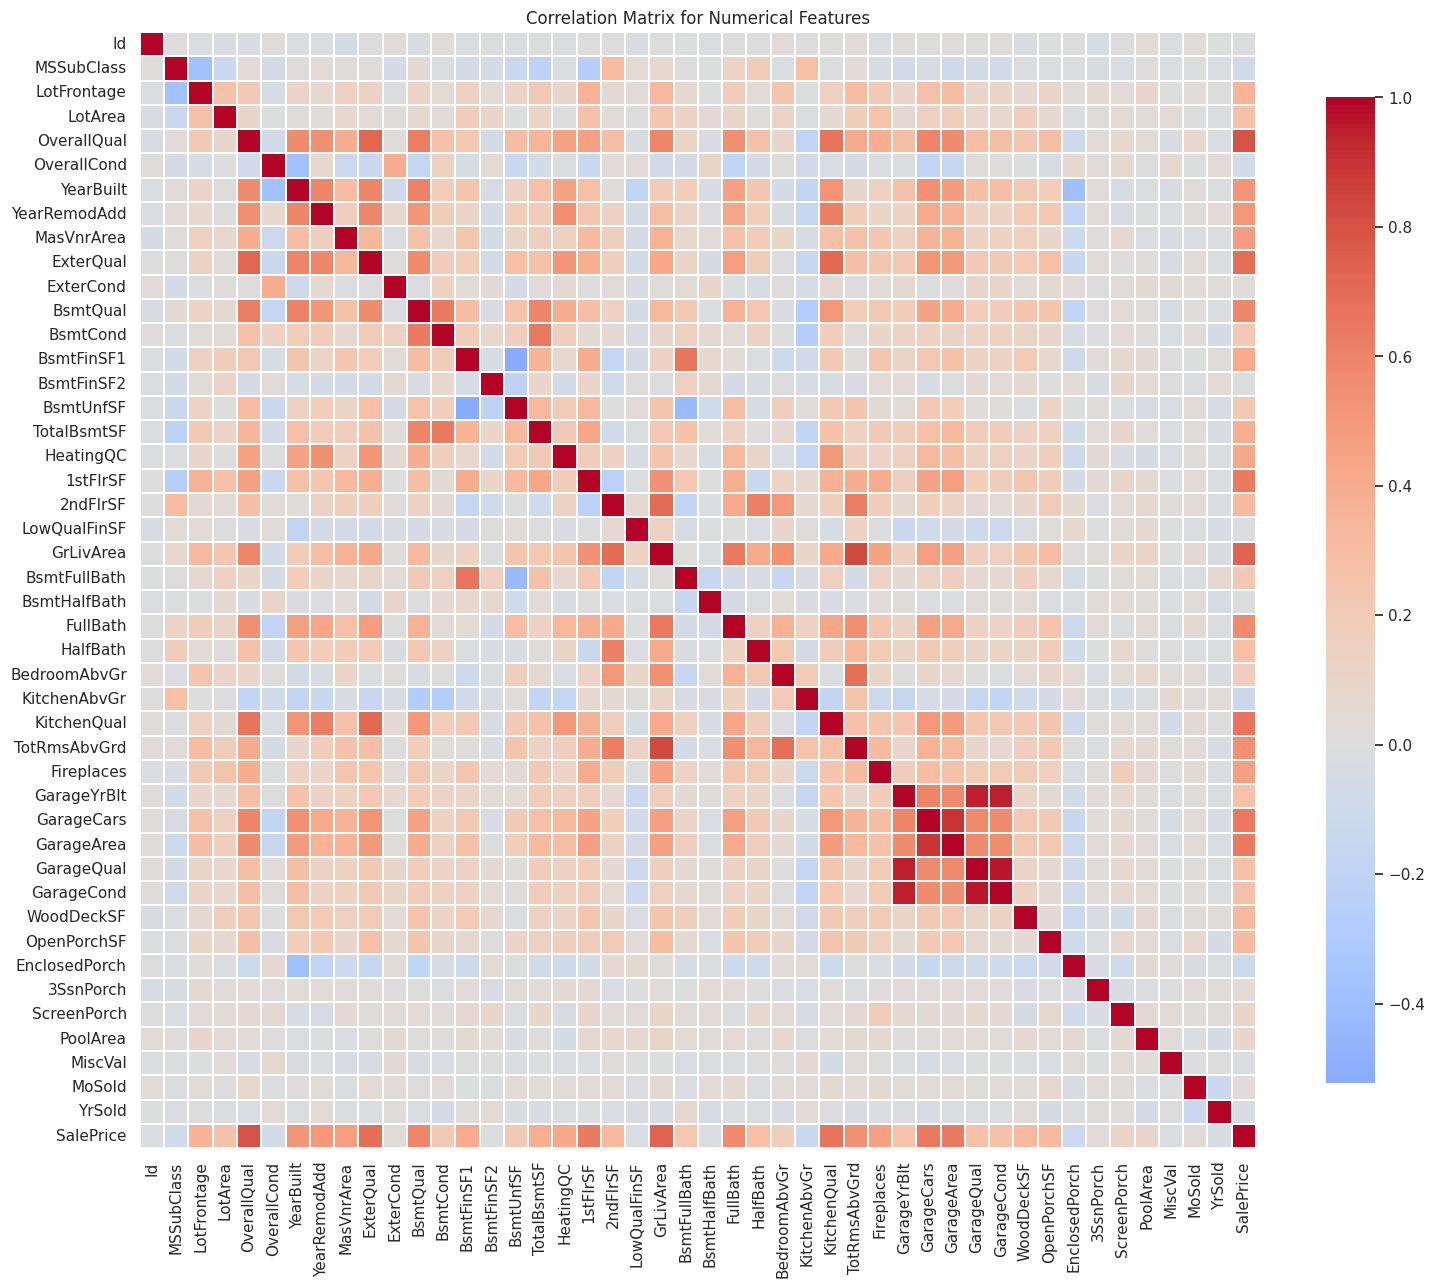

In [47]:
plt.figure(figsize=(18,16))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidth=0.2,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


In [48]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()

corr_pairs = (
    corr_matrix
    .abs()
    .unstack()
    .reset_index()
)

corr_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs["Feature_1"] != corr_pairs["Feature_2"]]

# Remove duplicate pairs (A-B and B-A)
corr_pairs["ordered_pair"] = corr_pairs.apply(
    lambda row: tuple(sorted([row["Feature_1"], row["Feature_2"]])),
    axis=1
)

corr_pairs = corr_pairs.drop_duplicates(subset="ordered_pair")

# Drop helper column
corr_pairs = corr_pairs.drop(columns="ordered_pair")

# Filter high correlations
high_corr_pairs = corr_pairs[corr_pairs["Correlation"] >= 0.7]

# Sort descending
high_corr_pairs = high_corr_pairs.sort_values(
    by="Correlation", ascending=False
)

high_corr_pairs.head(15)

##I used ChatGPT to help here. I prompted it with exactly what I wanted and iterated over several versions until it worked how I intended

,Feature_1,Feature_2,Correlation
1599,GarageQual,GarageCond,0.959168
1461,GarageYrBlt,GarageCond,0.949406
1460,GarageYrBlt,GarageQual,0.946624
1505,GarageCars,GarageArea,0.892662
995,GrLivArea,TotRmsAbvGrd,0.829498
229,OverallQual,SalePrice,0.795774
1011,GrLivArea,SalePrice,0.734968
193,OverallQual,ExterQual,0.723286
442,ExterQual,KitchenQual,0.713812


In [49]:
drop_cols = [
    "GarageCond",
    "GarageQual",
    "GarageArea"
]

numeric_df_reduced = numeric_df.drop(columns=drop_cols)
print(numeric_df_reduced.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0          4  ...           0           61   
1          1976         0.0          3  ...         298            0   
2          2002       162.0          4  ...           0           42   
3          1970         0.0          3  ...           0           35   
4          2000       350.0          4  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0      

To assess multicollinearity between features, a correlation matrix was used for all numeric and encoded features. I used conditional highlighting and filtered on a threshold to identify features with more than 70% correlation.The features surrounding garage information (quality, condition, year built) are all clustered and contain overlapping information. Keeping them all in the model will lead to multicollinearity so we will need to drop certain features to preserve their interpretability without creating redundancy. Other features like Overall quality and Above Ground Living Area showed strong correlations with Sale Price. The high correlation here is not a sign of multicollinearity but rather a good indicator that overall quality and above ground living area will be important features for the predictive model.

##Features to Drop
Given the high correlation between the garage features we should drop Garage Condition, Garage Quality, and Garage Year built. The garage cars feature should be the only garage related feature left to preserve its interpretability in the model but also to prevent any redundancy from highly correlated features. The model still has a significant amount of features that we may decide to drop later but for now I intentionally did not remove them if they did not have high multicollinearity or high missing values. I think it will be worth examining the effect of the remaining variables and decide during modeling and regularization how we want to proceed and if we want to drop those features.